In [84]:
import json
import numpy as np
import chardet
import nltk
import pandas as pd


filtered_columns = ['title', 'published', ]
df1 = pd.read_json('16119_webhose_2020_01_db21c91a1ab47385bb13773ed8238c31_0000002.json', lines=True)
df2 = pd.read_json('16119_webhose_2020_02_db21c91a1ab47385bb13773ed8238c31_0000002.json', lines=True)
listdf = df1.thread.values.flatten()
listdf2 = df2.thread.values.flatten()
#print (listdf)
df1_new = pd.json_normalize(listdf, max_level=2)
df2_new = pd.json_normalize(listdf2,max_level=2)
#print(df1_new)
#"facebook":{…}, "title", "published", "replies_count", "author", "url", "country", "text".
df_csv_filter = df1_new.filter(items=['social.facebook.comments','social.facebook.shares','social.facebook.likes','title','published','replies_count','author','url','country','text'])
df_csv_filter2 = df2_new.filter(items=['social.facebook.comments','social.facebook.shares','social.facebook.likes','title','published','replies_count','author','url','country','text'])
#print(df1_new.columns)
df_csv_filter['author'] = df1['author']
df_csv_filter['text'] = df1['text']
df_csv_filter2['author'] = df2['author']
df_csv_filter2['text'] = df2['text']

df_csv_filter_combined = pd.concat([df_csv_filter2,df_csv_filter])
#print(df_csv_filter.head())
df_csv_filter_combined.to_csv('out_final.csv', index=False)




In [85]:
textcol = df_csv_filter_combined['text'].to_string(header = False, index = False)

In [142]:
print(df_csv_filter.shape)
print(df_csv_filter2.shape)
print(df_csv_filter_combined.shape)

(10956, 10)
(95061, 10)
(106017, 10)


In [87]:
#tokenization
import nltk
tokens = nltk.word_tokenize(textcol)
print(len(tokens))


1008434


In [88]:
#convert all to lowercase
lowercase_words = [w.lower( ) for w in tokens] 
lowercase_words[:30]
print(len(lowercase_words))

1008434


In [89]:
#remove all non-alphabetic characters 
revised_words = [w for w in lowercase_words if w.isalpha()]
#revised_words[:30]
print(len(revised_words))

748264


In [91]:
#remove all stop words a, an, the
stopwords = nltk.corpus.stopwords.words('english')
stopped_words = [w for w in revised_words if w not in stopwords]
stopped_words[:30]
print(len(stopped_words))

512195


In [92]:
#Lemmatization
wnl = nltk.WordNetLemmatizer()
lemmatized_words = [wnl.lemmatize(t) for t in stopped_words]
lemmatized_words[:100]
print(len(lemmatized_words))

512195


In [144]:
#top 50 words by frequency
from nltk import FreqDist
fdist = FreqDist(lemmatized_words)
items = fdist.most_common(50)
for item in items:
    print (item)
    

('coronavirus', 12799)
('china', 8765)
('new', 5012)
('virus', 3590)
('health', 3585)
('case', 3297)
('chinese', 3253)
('february', 2880)
('news', 2802)
('world', 2633)
('death', 2463)
('people', 2236)
('outbreak', 2181)
('feb', 2104)
('reuters', 2092)
('say', 1897)
('beijing', 1816)
('stock', 1804)
('cruise', 1789)
('market', 1649)
('novel', 1593)
('u', 1537)
('c', 1533)
('first', 1529)
('toll', 1442)
('ap', 1405)
('two', 1364)
('said', 1362)
('ship', 1345)
('share', 1338)
('global', 1307)
('home', 1275)
('singapore', 1266)
('wuhan', 1246)
('official', 1169)
('government', 1160)
('passenger', 1140)
('hong', 1130)
('one', 1125)
('number', 1077)
('kong', 1055)
('th', 1029)
('japan', 1021)
('oil', 1014)
('confirmed', 1005)
('f', 1001)
('corona', 1000)
('report', 974)
('co', 953)
('mask', 944)


In [116]:
#top 50 bigrams by frequencies
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(lemmatized_words)
finder.apply_freq_filter(5)
scored = finder.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:50]:
    print(bscore)


(('death', 'toll'), 0.002543952986655473)
(('cruise', 'ship'), 0.002256952918322123)
(('coronavirus', 'outbreak'), 0.0022452386298187216)
(('hong', 'kong'), 0.0019719052314060076)
(('world', 'health'), 0.001772762326848173)
(('novel', 'coronavirus'), 0.0016146194320522456)
(('new', 'coronavirus'), 0.0015970479992971427)
(('coronavirus', 'case'), 0.0014369527230839816)
(('hour', 'ago'), 0.0012241431486055116)
(('health', 'organization'), 0.0010777145423129862)
(('coronavirus', 'death'), 0.0010581907281406496)
(('corona', 'virus'), 0.000966428801530667)
(('virus', 'case'), 0.0009410478431066293)
(('new', 'virus'), 0.0009312859360204609)
(('china', 'coronavirus'), 0.000919571647517059)
(('new', 'york'), 0.0008746668749206845)
(('stock', 'market'), 0.0007594763713038979)
(('new', 'case'), 0.0007516668456349632)
(('health', 'official'), 0.0007497144642177295)
(('face', 'mask'), 0.0007458097013832622)
(('case', 'coronavirus'), 0.0007262858872109255)
(('originally', 'published'), 0.0007126192

In [145]:
bigramPMITable = pd.DataFrame(list(finder.score_ngrams(bigram_measures.pmi)), 
                              columns=['bigram','PMI']).sort_values(by='PMI', ascending=False)

print (bigramPMITable[:50])

                      bigram        PMI
0           (billie, eilish)  16.644406
6              (minxin, pei)  16.644406
9             (questo, sito)  16.644406
8         (patricia, heaton)  16.644406
7            (ngio, spinout)  16.644406
1          (bottega, veneta)  16.644406
5             (leila, fadel)  16.644406
2            (brize, norton)  16.644406
4         (kylie, maclellan)  16.644406
3     (colecții, libertatea)  16.644406
11      (hunkering, cramped)  16.381371
10          (adrielly, eger)  16.381371
12           (estee, lauder)  16.381371
13            (hanna, ziady)  16.381371
14       (kidambi, srikanth)  16.381371
15          (tora, agarwala)  16.381371
21          (minka, klaudia)  16.158979
25            (đçăţ, üńčńďő)  16.158979
24  (precedenti, successivi)  16.158979
22         (nagłowki, tylko)  16.158979
23         (preah, sihanouk)  16.158979
20         (milicic, wasted)  16.158979
19             (katy, perry)  16.158979
18        (fionnula, hainey)  16.158979


In [118]:
#frequencyDistribution
from nltk.probability import FreqDist
fdist = FreqDist(tokens)
print(fdist)


<FreqDist with 60642 samples and 1008434 outcomes>
<FreqDist with 12771 samples and 12771 outcomes>


In [115]:
fdist.most_common(50)

[('...', 105126),
 (',', 24513),
 ('the', 20709),
 ('of', 16372),
 ('The', 14063),
 ('to', 13924),
 ('in', 12170),
 (':', 11800),
 ('a', 11606),
 ('(', 8872),
 ('China', 8636),
 ('on', 8273),
 (')', 7885),
 ('coronavirus', 7572),
 ('and', 6893),
 ('is', 6761),
 ('A', 6270),
 ('has', 6230),
 ('for', 5292),
 ('Coronavirus', 5061),
 ("'s", 5021),
 ('2020', 4656),
 ('-', 4637),
 ('’', 4284),
 ('from', 4074),
 ('s', 3958),
 ('are', 3683),
 ('By', 3553),
 ('at', 3424),
 ('.', 3266),
 ('Chinese', 3226),
 ('new', 3091),
 ('have', 3077),
 ('as', 3007),
 ('February', 2855),
 ('virus', 2778),
 ('that', 2700),
 ('—', 2621),
 ('by', 2528),
 ('Health', 2331),
 ('with', 2321),
 ('1', 2199),
 ('cases', 2154),
 ('--', 2077),
 ('Feb', 2050),
 ('t', 2012),
 ('will', 2008),
 ('Reuters', 1974),
 ('outbreak', 1923),
 ('|', 1914)]

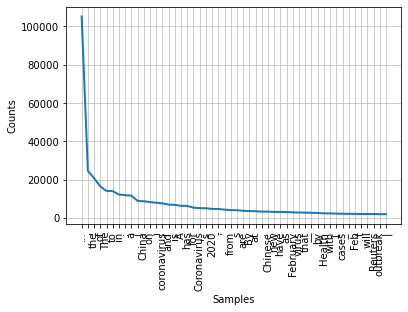

In [114]:
#frequencyDistribution - Plot
import matplotlib.pyplot as plt
fdist.plot(50,cumulative=False)
plt.show()

In [124]:
#forbigrams
from nltk.probability import FreqDist
fdist1 = FreqDist(scored)
print(fdist1)
fdist1.most_common(50)

<FreqDist with 12771 samples and 12771 outcomes>


[((('death', 'toll'), 0.002543952986655473), 1),
 ((('cruise', 'ship'), 0.002256952918322123), 1),
 ((('coronavirus', 'outbreak'), 0.0022452386298187216), 1),
 ((('hong', 'kong'), 0.0019719052314060076), 1),
 ((('world', 'health'), 0.001772762326848173), 1),
 ((('novel', 'coronavirus'), 0.0016146194320522456), 1),
 ((('new', 'coronavirus'), 0.0015970479992971427), 1),
 ((('coronavirus', 'case'), 0.0014369527230839816), 1),
 ((('hour', 'ago'), 0.0012241431486055116), 1),
 ((('health', 'organization'), 0.0010777145423129862), 1),
 ((('coronavirus', 'death'), 0.0010581907281406496), 1),
 ((('corona', 'virus'), 0.000966428801530667), 1),
 ((('virus', 'case'), 0.0009410478431066293), 1),
 ((('new', 'virus'), 0.0009312859360204609), 1),
 ((('china', 'coronavirus'), 0.000919571647517059), 1),
 ((('new', 'york'), 0.0008746668749206845), 1),
 ((('stock', 'market'), 0.0007594763713038979), 1),
 ((('new', 'case'), 0.0007516668456349632), 1),
 ((('health', 'official'), 0.0007497144642177295), 1),


In [127]:
#interpretation of results
feed = pd.read_csv('out_final.csv')
feed.head(3)                       #printing csv to show how many columns exist here

,social.facebook.comments,social.facebook.shares,social.facebook.likes,title,published,replies_count,url,country,author,text
0,2,1,2,Nigeria To Spend N620m On Coronavirus Preventi...,2020-02-08T21:05:00.000+02:00,0,https://www.informationng.com/2020/02/nigeria-...,US,Olayemi Oladotun,Nigeria To Spend N620m On Coronavirus Preventi...
1,0,0,0,"After White House Meeting, Oil Execs Put in Ca...",2020-02-07T21:46:00.000+02:00,0,https://my.gvtc.com/news/read/category/news/ar...,US,Newser — Newser Editors,The situation has apparently worsened for six ...
2,0,0,0,Doctor killed by coronavirus 'a symbol of tran...,2020-02-07T02:00:00.000+02:00,0,https://uk.news.yahoo.com/coronavirus-quaranti...,GB,Sky video,Doctor killed by coronavirus 'a symbol of tran...


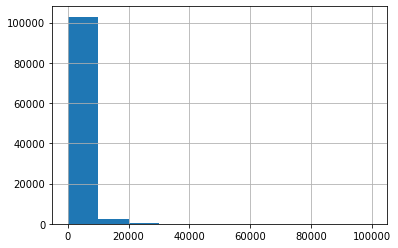

In [134]:
# number of characters present in each sentence of the text in feed.
# sentennce level analysis
feed['text'].str.len().hist()

C:\Users\kriti\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\kriti\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


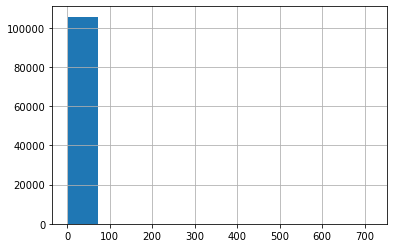

In [130]:
# word level analysis
feed['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

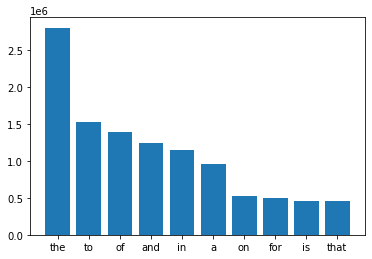

In [139]:
import pandas as pd
feed = pd.read_csv('out_final.csv')

# Snippet for Top Stopwords Barchart

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(news['text'])


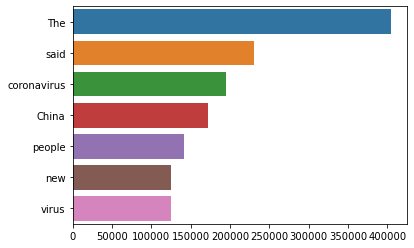

In [141]:
# Code Snippet for Top Non-Stopwords Barchart
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

feed = pd.read_csv('out_final.csv')
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(news['text'])
